# Setup

In [ ]:
!pip install -qU openai pytubefix opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Standard library imports
import base64
import time

# Third-party imports
import cv2

# Google Colab-specific imports
from google.colab import userdata

# Audio/Video processing libraries
from pytubefix import YouTube
from pytubefix.cli import on_progress

# OpenAI API
from openai import OpenAI

# Display utilities
from IPython.display import Audio, Image, display

asd

In [ ]:
class CFG:
    model = "gpt-4o-mini"


client = OpenAI(api_key=userdata.get("openaivision"))

# Do dzieła

In [ ]:
# get the video
video_url = "https://www.youtube.com/shorts/od1CPDImQxM"

yt = YouTube(video_url, on_progress_callback=on_progress)
print(yt.title)

ys = yt.streams.get_highest_resolution()
ys.download(filename="myfile.mp4")

So Excited... | Dog Jumps In Excitement After Seeing Its Meal


'/content/muhfile.mp4'

In [ ]:
# extract the frames
video = cv2.VideoCapture("/content/myfile.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

880 frames read.


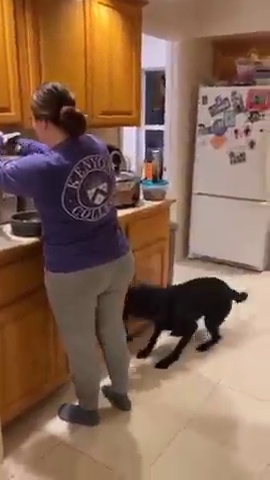

In [9]:
display_handle = display(None, display_id=True)
for img in base64Frames[:100]:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.05)

```python
display_handle = display(None, display_id=True)
```

Ten wiersz tworzy tzw. "uchwyt wyświetlania" (display handle), który działa jak zarezerwowany obszar w notatniku, który możemy później aktualizować. Parametr `display_id=True` sprawia, że ten obszar otrzymuje unikalny identyfikator, dzięki czemu możemy go odnaleźć i zaktualizować później. Początkowa wartość `None` oznacza, że na początku nic nie jest wyświetlane w tym obszarze.

Ten mechanizm można porównać do tradycyjnego flipbooka, gdzie szybkie przewracanie stron z nieco różniącymi się obrazkami tworzy iluzję ruchu. W tym przypadku komputer automatycznie "przewraca strony" w określonym tempie, a my widzimy animację bezpośrednio w notatniku.

### Option 1 (text + video to text)

In [10]:
prompt1 = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": CFG.model,
    "messages": prompt1,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

**Video Description:**

Join us for a delightful kitchen adventure featuring an enthusiastic pup determined to lend a paw! Watch as our playful dog showcases its acrobatic skills while trying to catch a glimpse (and maybe a snack or two) from the countertop. This heartwarming scene combines a little mischief and a lot of laughter, highlighting the special bond between pets and their humans. Whether it's the hope of a tasty treat or just sheer curiosity, this furry friend’s antics are sure to bring a smile to your face. Share the fun, and don't forget to like and subscribe for more adorable pet moments! 🐾🍽️✨


Najpierw tworzona jest struktura zapytania (prompt) do modelu AI:

```python
prompt1 = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
```

Ten kod jest wyjątkowo interesujący, ponieważ tworzy multimodalny prompt - łączący tekst i obrazy w jednym zapytaniu. Dzieje się tu kilka ważnych rzeczy:

1. Definiujemy rolę zapytania jako "user", co oznacza, że model będzie interpretował zawartość jako pochodzącą od użytkownika.

2. Zawartość zapytania zawiera dwa elementy:
   - Instrukcję tekstową: "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video."
   - Sekwencję obrazów wybranych z naszych klatek wideo

3. Obrazy są wybierane przy użyciu wyrażenia `base64Frames[0::50]`, co oznacza, że bierzemy co 50-tą klatkę z pełnego wideo. Jest to technika próbkowania, która pozwala zaprezentować model AI kluczowe momenty wideo bez przekazywania wszystkich klatek (co byłoby nieefektywne i mogłoby przekroczyć limity API).

4. Funkcja `map` przekształca każdą wybraną klatkę w słownik zawierający dwa klucze:
   - "image": sama zakodowana klatka
   - "resize": wartość 768, która określa wymiar, do którego obraz zostanie przeskalowany przed przetworzeniem przez model

5. Operator rozpakowania `*` umieszcza wszystkie te przekształcone obrazy jako oddzielne elementy w liście zawartości.

### Option 2 (text + video to text then audio)

In [11]:
prompt2 = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of David Attenborough.\
            Only include the narration.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::60]),
        ],
    },
]
params = {
    "model": CFG.model,
    "messages": prompt2,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
narrative = result.choices[0].message.content
print(narrative)

# save
f = open("attenborough_narrator.txt", "a")
f.write(narrative)
f.close()

In the heart of a lively kitchen, a remarkable dance unfolds. Here, amidst the aromas of home-cooked meals, our playful protagonist, a spirited black Labrador, stands at the precipice of culinary curiosity. 

With boundless enthusiasm, it leaps into the air, its sleek form catching the light as it ventures closer to the source of tantalizing scents. The human, focused on her task, remains unperturbed by this interruption, illustrating the harmonious relationship that often blossoms in such domestic settings. 

As the dog lands gracefully, it shifts between stealth and exuberance, a master of its domain, keenly aware of the treasures that may lie within reach. Each jump is a testament to its playful spirit and undeterred curiosity—a reminder of the joy that simple moments can bring.

In this realm of shared companionship, joy and mischief intertwine, capturing the essence of life’s delightful routines. Nature's wonder, indeed, is often found right at home.


In [ ]:
# write to file
voice = "onyx"

speech_file_path = "attenborough_narrator.mp3"

response_audio = client.audio.speech.create(model="tts-1", voice=voice, input=narrative)

response_audio.stream_to_file(speech_file_path)

<ipython-input-12-d822af762abe>:12: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response_audio.stream_to_file(speech_file_path)


In [13]:
Audio(speech_file_path)